#### Assignment 0
#### Name: Harsha Vardhan Narla
#### Roll: 2019101122
#### Whole Code folder [Link](https://drive.google.com/drive/folders/1xSXOYsxOkluh0bGGA2hcoRic8uq9sGfj?usp=sharing)



In [2]:
! mkdir frames_1
! mkdir frames_2 
import cv2 as cv
import sys
import glob
import numpy as np
import matplotlib.pyplot as plt
import re

mkdir: cannot create directory ‘frames_1’: File exists


### Write a program to convert a given video to its constituent images

(-0.5, 595.5, 335.5, -0.5)

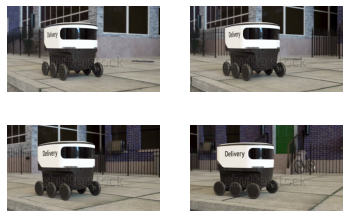

In [3]:
out_loc = "frames_1"
filename = "video_1.mp4"

video_capture = cv.VideoCapture(filename)

frame_num=0

while(video_capture.isOpened()):
    flag , cur_frame = video_capture.read()
    if not flag:
        break
    cv.imwrite(out_loc+"/"+str(frame_num)+".png",cur_frame)
    frame_num+=1

video_capture.release()
cv.destroyAllWindows()

plt.subplot(2,2,1)
plt.imshow(cv.imread(out_loc+"/"+str(10)+".png"))
plt.axis("off")
plt.subplot(2,2,2)
plt.imshow(cv.imread(out_loc+"/"+str(40)+".png"))
plt.axis("off")
plt.subplot(2,2,3)
plt.imshow(cv.imread(out_loc+"/"+str(80)+".png"))
plt.axis("off")
plt.subplot(2,2,4)
plt.imshow(cv.imread(out_loc+"/"+str(160)+".png"))
plt.axis("off")


Write another program that will merge a set of images in a folder into a single video.

In [4]:
frames_arr=[]
frames = glob.glob('./frames_1/*.png')
frames = sorted(frames, key=lambda x:float(re.findall("(\d+)",x)[1]))


for file in frames:
    img = cv.imread(file)
    frames_arr.append(img)

h , w, l = frames_arr[10].shape

framerate =20
fourcc =cv.VideoWriter_fourcc(*'mp4v')
video = cv.VideoWriter('outvideo_1.mp4',fourcc,framerate,(w,h))

for img in frames_arr:
    video.write(img)

cv.destroyAllWindows()
video.release()

- Runned the code with different frame rates which decreased duration of video and increased clarity (smoothness) of video
- Getting all filenames from folder had some problem , glob.glob gives them unsorted i have applied sorting using re package
- Tried different formats

### Capture Images Using Webcam

In [5]:
count = 0
video_cam = cv.VideoCapture(0)

while(True):
    flag,cur_frame = video_cam.read()
    cv.imwrite("frames_2/%d.jpg" %count,cur_frame)
    cv.imshow('frame', cur_frame)
    count += 1
    if cv.waitKey(1) & 0xFF == ord('q'):
        break
        
video_cam.release()
cv.destroyAllWindows()

(-0.5, 639.5, 479.5, -0.5)

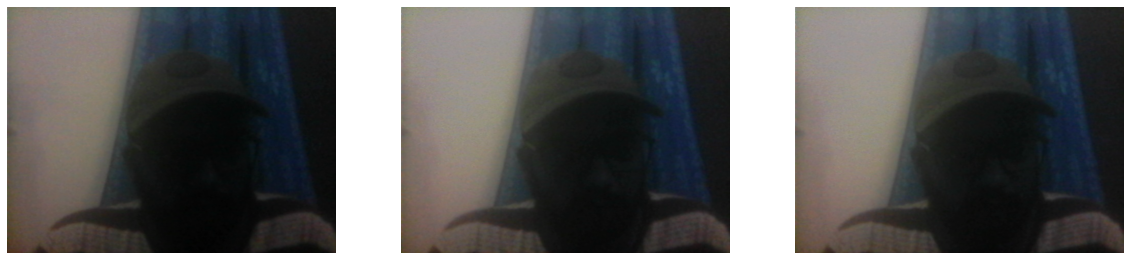

In [9]:
plt.figure(figsize=(20,15))
plt.subplot(1,3,1)
plt.imshow(cv.imread('frames_2/0.jpg'))
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(cv.imread('frames_2/1.jpg'))
plt.axis("off")


plt.subplot(1,3,3)
plt.imshow(cv.imread('frames_2/2.jpg'))
plt.axis("off")


Create an interesting composite of two videos using chroma keying technique

In [6]:

def rgb2bgr(r,g,b):
    return b,g,r


video_capture_front = cv.VideoCapture("video_2_front.mp4")
video_capture_back = cv.VideoCapture("video_2_back.mp4")
lower_green = np.array(rgb2bgr(0,100,0))
upper_green = np.array(rgb2bgr(120,255,120))

h,w,l=video_capture_front.read()[1].shape



fl = True
out_arr=[]
pic_list = []
while(video_capture_front.isOpened()):
    flag , cur_frame_front = video_capture_front.read()
    if not flag:
        break
    flag , cur_frame_back = video_capture_back.read()
    
    mask = cv.inRange(cur_frame_front,lower_green,upper_green)
    front = np.copy(cur_frame_front)
    front[mask != 0]=[0,0,0]
    back = np.copy(cur_frame_back)
    back[mask == 0]=[0,0,0]
    out_arr.append(front+back)
    if fl:
        pic_list.append(cur_frame_front)
        pic_list.append(cur_frame_back)
        pic_list.append(front+back)
        fl = False


framerate =20
fourcc =cv.VideoWriter_fourcc(*'mp4v')
video = cv.VideoWriter('outvide_2.mp4',fourcc,framerate,(w,h))

for img in out_arr:
    video.write(img)

cv.destroyAllWindows()
video.release()




(-0.5, 1279.5, 719.5, -0.5)

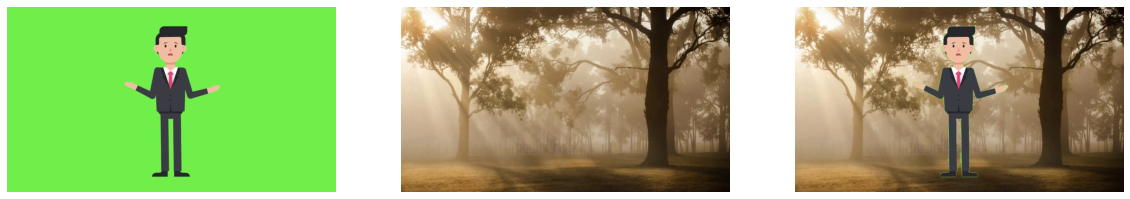

In [7]:
plt.figure(figsize=(20,15))
plt.subplot(1,3,1)
plt.imshow(cv.cvtColor(pic_list[0],cv.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(cv.cvtColor(pic_list[1],cv.COLOR_BGR2RGB))
plt.axis("off")


plt.subplot(1,3,3)
plt.imshow(cv.cvtColor(pic_list[2],cv.COLOR_BGR2RGB))
plt.axis("off")


- Cv2 gives the image in BGR order
- So, converted the lower and upper limits of green to bgr order
- This technique can be used for all colours not only green and also for defined colour range also, At first i thought it could only detect specific colour but came to know we can specify range of color spectrum as background.
- One Interesting example for above point would be we can change morning sky (light blue set) to night light (dark)
- At first tried the while loop till both videos finish , then realized it should stop as soon as foreground video is completed (> background)
- The upper and lower limits of background color (in this case green) will not have any fixed range it should be tweaked according to the image, In the above example aslo the green is not (0,255,0) it is (100,255,100).